In [2]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy

In [3]:
## load the insurance.csv. display info and head
df = pd.read_csv('Data/insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Q1: Do smokers have higher insurance charges than non-smokers?


- $H_0$ (Null Hypothesis): There is no significant difference between charges for smokers vs nonsmokers
- $H_A$ (Alternative Hypothesis):  There is a significant difference between charges for smokers vs nonsmokers.

###  Determine the correct test to perform.
- Type of Data? numeric
- How many groups/samples? 2 groups
- Therefore, which test is appropriate? 2 sample t-test

In [5]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
## create a column that easily separates our groups
df['is_smoker'] = df['smoker'].str.contains('yes')
df['is_smoker'].value_counts()

False    1064
True      274
Name: is_smoker, dtype: int64

In [13]:
## save list of columns needed for each group
needed_cols = ['is_smoker', 'charges']

In [14]:
## save male team in separate variable
smoker_df = df.loc[df['is_smoker']==True, needed_cols]
smoker_df

,is_smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [15]:
## save male team in separate variable
nonsmoker_df = df.loc[df['is_smoker']==False, needed_cols]
nonsmoker_df

,is_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [16]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([smoker_df, nonsmoker_df])
plot_df

,is_smoker,charges
0,True,16884.9240
11,True,27808.7251
14,True,39611.7577
19,True,36837.4670
23,True,37701.8768
...,...,...
1332,False,11411.6850
1333,False,10600.5483
1334,False,2205.9808
1335,False,1629.8335


<AxesSubplot: xlabel='is_smoker', ylabel='charges'>

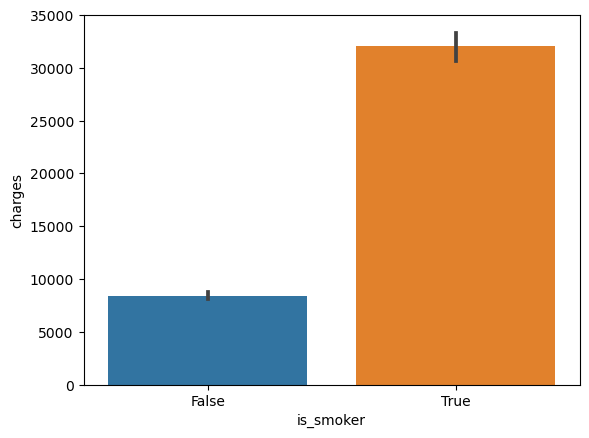

In [17]:
## visualize the group means
sns.barplot(data=plot_df, x='is_smoker', y='charges')

### Checking Assumption for No Significant Outlier

In [18]:
## Saving JUST the numeric col as final group variables
smoker_group = smoker_df['charges']
nonsmoker_group = nonsmoker_df['charges']
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [19]:
## Check smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3

## how many outliers?
smoker_outliers.sum()

0

In [20]:
## Check nonsmoker group for outliers
nonsmoker_outliers = np.abs(stats.zscore(nonsmoker_group)) > 3

## how many outliers?
nonsmoker_outliers.sum()

24

In [21]:
## remove outliers from female_group
nonsmoker_group = nonsmoker_group.loc[~nonsmoker_outliers]
nonsmoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

### Test for Normality
- According to the workflow, since both groups have n > 15, we can safely ignore the assumption of normality.

### Test for Equal Variance

In [22]:
## Use Levene's test for equal variance
result = stats.levene(smoker_group, nonsmoker_group)
print(result)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


In [23]:
## Use an if-else to help interpret the p-value
if result.pvalue < 0.5:
    print(f'The groups do NOT have equal variance.')
else:
    print(f'the groups DO have equal variance.')

The groups do NOT have equal variance.


In [24]:
## run final hypothess test
result = stats.ttest_ind(smoker_group, nonsmoker_group, equal_var=False)
print(result)
result.pvalue < 0.05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)


True

- Our Welch's T-Test return a p-value < .05 we reject the null hypothesis and support the alternative hypothesis that there is a significant difference in charges for smokers and nonsmokers.
- In order to know if they are funded significantly MORE or LESS, we look at the actual means of our final groups

In [25]:
## make a plot or calcualte group means to know which group had more/less.
smoker_group.mean()

32050.23183153284

In [26]:
## make a plot or calcualte group means to know which group had more/less.
nonsmoker_group.mean()

7939.8608446721155

# Q2. Are men more likely to smoke than women?

- $H_0$ (Null Hypothesis): There is no significant difference between charges for males vs females
- $H_A$ (Alternative Hypothesis):  There is a significant difference between charges for males vs females.

###  Determine the correct test to perform.
- Type of Data? numeric
- How many groups/samples? 2 groups
- Therefore, which test is appropriate? 2 sample t-test

In [27]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [41]:
## create a column that easily separates our groups
df['female'] = df['sex'].str.contains('female')
df['female'].value_counts()

False    676
True     662
Name: female, dtype: int64

In [42]:
## save list of columns needed for each group
needed_cols = ['female', 'charges']

In [43]:
## save male team in separate variable
female_df = df.loc[df['female']==True, needed_cols]
female_df

,female,charges
0,True,16884.92400
5,True,3756.62160
6,True,8240.58960
7,True,7281.50560
9,True,28923.13692
...,...,...
1332,True,11411.68500
1334,True,2205.98080
1335,True,1629.83350
1336,True,2007.94500


In [44]:
## save male team in separate variable
male_df = df.loc[df['female']==False, needed_cols]
male_df

,female,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
8,False,6406.41070
...,...,...
1324,False,4239.89265
1325,False,13143.33665
1327,False,9377.90470
1329,False,10325.20600


In [45]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([male_df, female_df])
plot_df

,female,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
8,False,6406.41070
...,...,...
1332,True,11411.68500
1334,True,2205.98080
1335,True,1629.83350
1336,True,2007.94500


<AxesSubplot: xlabel='female', ylabel='charges'>

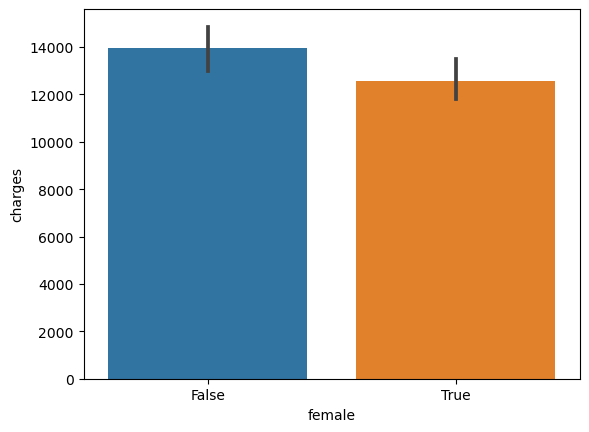

In [46]:
## visualize the group means
sns.barplot(data=plot_df, x='female', y='charges')

### Checking Assumption for No Significant Outlier

In [47]:
## Saving JUST the numeric col as final group variables
male_group = male_df['charges']
female_group = female_df['charges']
male_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
8        6406.41070
           ...     
1324     4239.89265
1325    13143.33665
1327     9377.90470
1329    10325.20600
1333    10600.54830
Name: charges, Length: 676, dtype: float64

In [48]:
## Check smoker group for outliers
male_outliers = np.abs(stats.zscore(male_group)) > 3

## how many outliers?
male_outliers.sum()

2

In [49]:
## remove outliers from female_group
male_group = male_group.loc[~male_outliers]
male_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
8        6406.41070
           ...     
1324     4239.89265
1325    13143.33665
1327     9377.90470
1329    10325.20600
1333    10600.54830
Name: charges, Length: 674, dtype: float64

In [50]:
## Check smoker group for outliers
female_outliers = np.abs(stats.zscore(female_group)) > 3

## how many outliers?
female_outliers.sum()

14

In [51]:
## remove outliers from female_group
female_group = female_group.loc[~female_outliers]
female_group

0       16884.92400
5        3756.62160
6        8240.58960
7        7281.50560
9       28923.13692
           ...     
1332    11411.68500
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 648, dtype: float64

### Test for Normality
- According to the workflow, since both groups have n > 15, we can safely ignore the assumption of normality.

### Test for Equal Variance

In [52]:
## Use Levene's test for equal variance
result = stats.levene(male_group, female_group)
print(result)

LeveneResult(statistic=21.017703365818452, pvalue=4.9818696750984455e-06)


In [53]:
## Use an if-else to help interpret the p-value
if result.pvalue < 0.5:
    print(f'The groups do NOT have equal variance.')
else:
    print(f'the groups DO have equal variance.')

The groups do NOT have equal variance.


In [54]:
## run final hypothess test
result = stats.ttest_ind(male_group, female_group, equal_var=False)
print(result)
result.pvalue < 0.05

Ttest_indResult(statistic=3.3017354023501224, pvalue=0.000987865730303943)


True

- Our Welch's T-Test return a p-value < .05 we reject the null hypothesis and support the alternative hypothesis that there is a significant difference in charges for females and males.
- In order to know if they are charged significantly MORE or LESS, we look at the actual means of our final groups

In [55]:
## make a plot or calcualte group means to know which group had more/less.
male_group.mean()

13816.245584688428

In [56]:
## make a plot or calcualte group means to know which group had more/less.
female_group.mean()

11761.8902915571

# - Q3. Do different regions have different charges, on average?

In [57]:
# Create groups dictionary.
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [59]:
groups_df = pd.DataFrame(groups)
groups_df.head()

,southwest,southeast,northwest,northeast
0,16884.924,NaN,NaN,NaN
1,NaN,1725.5523,NaN,NaN
2,NaN,4449.4620,NaN,NaN
3,NaN,NaN,21984.47061,NaN
4,NaN,NaN,3866.85520,NaN


In [60]:
print(np.sum(np.abs(stats.zscore(groups_df['southwest'])) < 3))
print(np.sum(np.abs(stats.zscore(groups_df['southeast'])) < 3))
print(np.sum(np.abs(stats.zscore(groups_df['northwest'])) < 3))
print(np.sum(np.abs(stats.zscore(groups_df['northeast'])) < 3))

0
0
0
0


In [61]:
groups_data = {}

for col in groups_df.columns:
  print(col)
  data = np.sum(np.abs(stats.zscore(groups_df[col])) < 3)
  groups_data[col] = data

southwest
southeast
northwest
northeast


In [62]:
groups_data.items()

dict_items([('southwest', 0), ('southeast', 0), ('northwest', 0), ('northeast', 0)])